Fase 1: Exploración y Limpieza
Exploración Inicial:
Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
Une los dos conjuntos de datos de la forma más eficiente.

Fase 1: Exploración y Limpieza
Exploración Inicial:
Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
Une los dos conjuntos de datos de la forma más eficiente.

Fase 1: Exploración y Limpieza
Exploración Inicial:
Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
Une los dos conjuntos de datos de la forma más eficiente.

In [31]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest,chi2_contingency,ttest_ind

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [32]:
#abro los dos ficheros de trabajo
df_flight = pd.read_csv("Customer Flight Activity.csv").reset_index(drop=True)
df_loyalty = pd.read_csv("Customer Loyalty History.csv").reset_index(drop=True)

In [33]:
df_mergeado_inner = df_flight.merge(df_loyalty, left_on='Loyalty Number', right_on = "Loyalty Number")


In [34]:

def exploracion_dataframe(dataframe):
    """
    Realiza un análisis exploratorio detallado de un DataFrame.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.

    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    # Duplicados
    duplicados = dataframe.duplicated().sum()
    print(f"Duplicados en el conjunto de datos: {duplicados}")
    print("\n ..................... \n")
    
    # Tipos de datos por columna
    print("Tipos de datos por columna:")
    print(pd.DataFrame(dataframe.dtypes, columns=["Tipo de Dato"]))
    print("\n ..................... \n")
    
    # Nulos de columnas numéricas en porcentajes
    nulos_numericas = dataframe.select_dtypes(include=["float64", "int64"]).isnull().sum() / dataframe.shape[0] * 100
    print("Porcentaje de nulos para columnas numéricas:")
    print(pd.DataFrame(nulos_numericas, columns=["% Nulos"]))
    print("\n ..................... \n")
    
    # Nulos de columnas categóricas en porcentajes
    nulos_categoricas = dataframe.select_dtypes(include="O").isnull().sum() / dataframe.shape[0] * 100
    print("Porcentaje de nulos para columnas categóricas:")
    print(pd.DataFrame(nulos_categoricas, columns=["% Nulos"]))
    print("\n ..................... \n")
    
    # Valores únicos para columnas categóricas
    print("Valores únicos para columnas categóricas:")
    dataframe_categoricas = dataframe.select_dtypes(include="O")
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene los siguientes valores únicos:")
        print(dataframe[col].value_counts().head())
    print("\n ..................... \n")
    
    # Estadísticas descriptivas para columnas numéricas
    print("Estadísticas descriptivas para columnas numéricas:")
    print(dataframe.describe(include=["float64", "int64"]).T)
    print("\n ..................... \n")
    
    # Estadísticas descriptivas para columnas categóricas
    print("Estadísticas descriptivas para columnas categóricas:")
    print(dataframe.describe(include="O").T)
    print("\n ..................... \n")




In [35]:
print("Con la exploración vemos que hay duplicados y nulos.\nOptamos por no eliminar los duplicados ya que viendo las columnas del df\npodriamos sospechar que se trata de Loyal Number (ejerce como un client id),\nclientes que han viajado en varias ocasiones.\n")
print("Para los nulos observamos que las columnas Cancellation Month y Year tienen un alto porcentaje de nulos\nLas eliminamos y seguimos investigando la columna Salrios")

print("-------------------")

exploracion_dataframe(df_mergeado_inner)


Con la exploración vemos que hay duplicados y nulos.
Optamos por no eliminar los duplicados ya que viendo las columnas del df
podriamos sospechar que se trata de Loyal Number (ejerce como un client id),
clientes que han viajado en varias ocasiones.

Para los nulos observamos que las columnas Cancellation Month y Year tienen un alto porcentaje de nulos
Las eliminamos y seguimos investigando la columna Salrios
-------------------
Duplicados en el conjunto de datos: 1864

 ..................... 

Tipos de datos por columna:
                            Tipo de Dato
Loyalty Number                     int64
Year                               int64
Month                              int64
Flights Booked                     int64
Flights with Companions            int64
Total Flights                      int64
Distance                           int64
Points Accumulated               float64
Points Redeemed                    int64
Dollar Cost Points Redeemed        int64
Country               

In [36]:
columnas_a_eliminar = ['Cancellation Month', 'Cancellation Year']

# Elimina las columnas especificadas
df_mergeado_inner.drop(columns=columnas_a_eliminar, inplace=True)

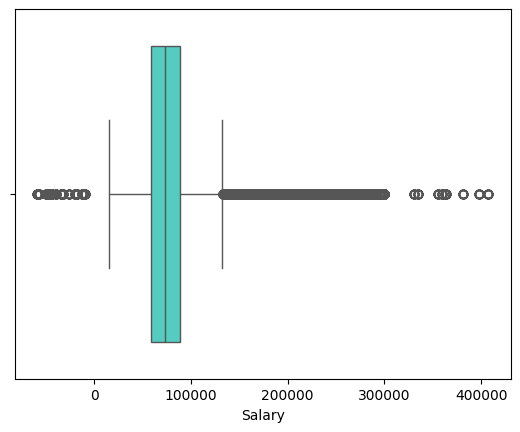

In [37]:
#Hacemos una gráfica para ver cómo se distributen los valores de la columna Salarios que tiene nulos.
sns.boxplot(x = "Salary", 
            data = df_mergeado_inner, 
            color = "turquoise");

plt.show()



In [38]:
#Vemos que en la columna de Salary hay valores negativos.
hay_negativos = (df_mergeado_inner["Salary"] < 0).any()
print(f"{hay_negativos}: existen negativos")
df_mergeado_inner.loc[df_mergeado_inner['Salary']< 0, "Salary":"Marital Status"].sample(5)


True: existen negativos


,Salary,Marital Status
57625,-47310.0,Married
175046,-45962.0,Married
206102,-19325.0,Single
281606,-34079.0,Married
57634,-47310.0,Married


In [39]:
#transformamos en valores absolutos los valores de la columna "Salary"
df_mergeado_inner['Salary'] = df_mergeado_inner['Salary'].abs()

#comprobamos que no hayan negativos
df_mergeado_inner[df_mergeado_inner['Salary']< 0]


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month


In [40]:
df_mergeado_inner["Salary"].fillna(0, inplace=True)


In [41]:
df_mergeado_inner.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
dtype: int64

In [42]:
# como vamos a crear columnas nuevas, vamos a hacer una copia del DataFrame usando el método 'copy()'
df_merge_copy = df_mergeado_inner.copy()


VISUALIZACIÓN

Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

1.¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

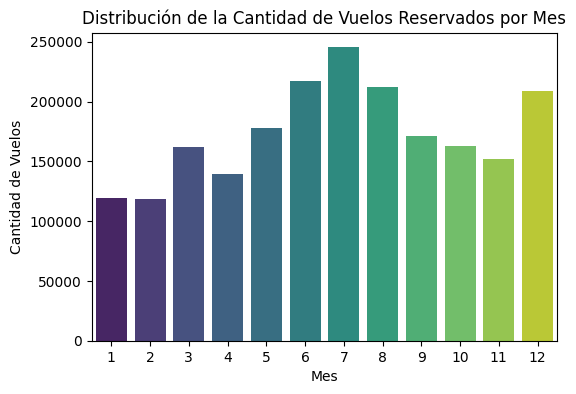

In [43]:
#Agrupamos los vuelos por mes.La variable resultante de la agrupación es un object.

vuelos_mes = df_merge_copy.groupby('Month')['Total Flights'].sum().reset_index()

#Ahora pasamos a visualizar, para ello usamos un barplot porque estamos analizando una columna numérica
# y una variable de tipo object.

# Crear el gráfico de barras:

plt.figure(figsize=(6, 4))
sns.barplot(x='Month', y='Total Flights', data=vuelos_mes, palette="viridis")
plt.title('Distribución de la Cantidad de Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos')
plt.show()


2.¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

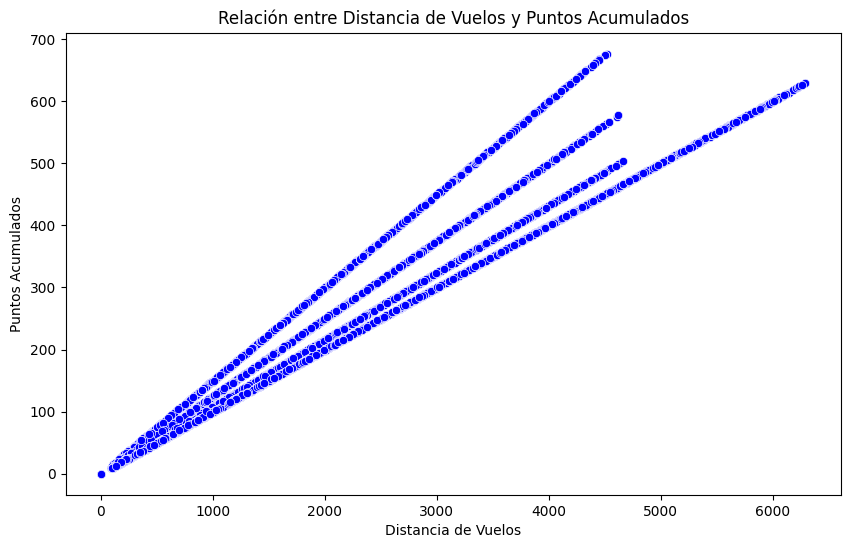

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Points Accumulated', data=df_merge_copy, color='blue')
plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia de Vuelos')
plt.ylabel('Puntos Acumulados')
plt.show()

3.¿Cuál es la distribución de los clientes por provincia o estado?

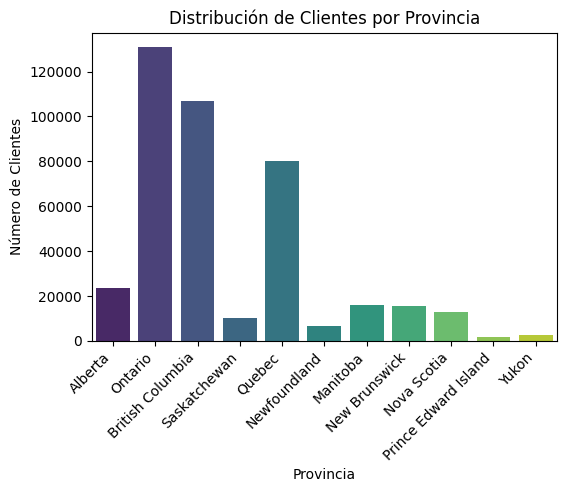

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Province', data=df_merge_copy, palette='viridis')
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

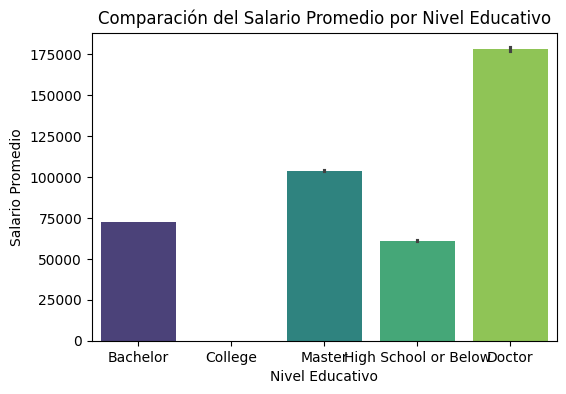

In [46]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Education', y='Salary', data=df_merge_copy, palette="viridis")
plt.title('Comparación del Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.show()

¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

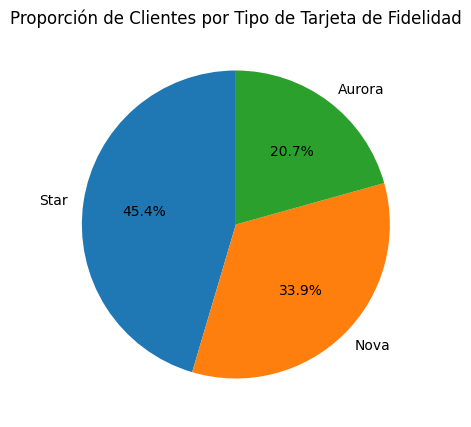

In [47]:
#Primero vemos qué variables se busca representar, en éste caso es categórica. 
# Además se nos pide las proporciones; pieplot
# Buscamos los valores en "Loyalty Card", si hay pocos podemos definirlos como las etiquetas
Card_Values = df_merge_copy['Loyalty Card'].value_counts()

Index= Card_Values.index

# Configurar el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(Card_Values, labels=Index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.show()

¿Cómo se distribuyen los clientes según su estado civil y género?

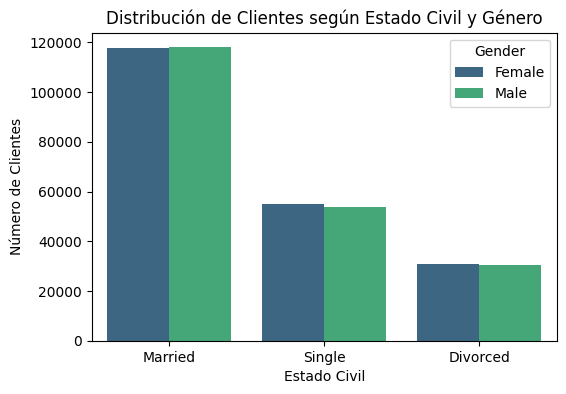

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Marital Status', hue='Gender', data=df_merge_copy, palette="viridis")
plt.title('Distribución de Clientes según Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.show()


Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [49]:
df_evaluacion_vuelos_educacion = df_merge_copy[['Flights Booked', 'Education']]
df_evaluacion_vuelos_educacion

,Flights Booked,Education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor
...,...,...
405619,0,Bachelor
405620,0,Bachelor
405621,0,Bachelor
405622,0,Bachelor


Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [50]:
df_merge_copy["Education"].value_counts()

Education
Bachelor                253752
College                 102672
High School or Below     19008
Doctor                   17856
Master                   12336
Name: count, dtype: int64

In [51]:
def categorizar_grupos(educacion):
    if educacion == "College" or educacion == "High School or Below":
        return "Educación Básica"
    else:
        return "Educación Superior"
    

df_merge_copy["Grupo Educacion"]= df_merge_copy["Education"].apply(categorizar_grupos)

In [52]:
df_merge_copy["Grupo Educacion"].value_counts()

Grupo Educacion
Educación Superior    283944
Educación Básica      121680
Name: count, dtype: int64

Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

1.Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [53]:
#Agrupo por Loyalty Number y sumo los vuelos reservados. 
# En la columna Loyalty Number tenemos núm de clientes repetidos,
# con la agrupación puedo ver el núm de reservas total por cada cliente.
#Creo un df para poder hacer el merge con el df siguiente.
df_test=df_merge_copy.groupby("Loyalty Number")["Flights Booked"].sum()
df_test = df_test.reset_index(name='Flights Booked')


In [54]:
# En este caso del df principal sólo me interesa el loyalty number y su grupo según nivel educación.
# Como tengo duplicados, causados por la columna Loyalty Nomber, hago el drop.
df_test2=df_merge_copy[["Loyalty Number","Grupo Educacion"]]
df_test2 = df_test2.drop_duplicates()

In [55]:
#Unifico las dos tablas para poder trabajar el AB Testing
df_merged_AB= pd.merge(df_test, df_test2, on='Loyalty Number', how='inner')
df_merged_AB

,Loyalty Number,Flights Booked,Grupo Educacion
0,100018,157,Educación Superior
1,100102,173,Educación Básica
2,100140,152,Educación Básica
3,100214,79,Educación Superior
4,100272,127,Educación Superior
...,...,...,...
16732,999902,178,Educación Básica
16733,999911,0,Educación Superior
16734,999940,63,Educación Superior
16735,999982,22,Educación Básica


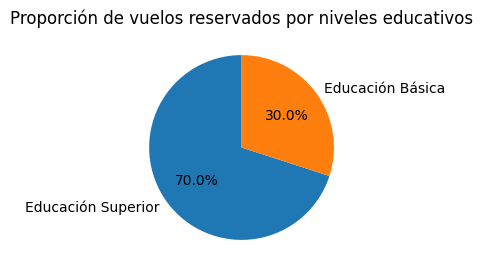

In [56]:
#Hago una visualización sobre cómo se reparte el numero de vuelos reservados para ambos grupos.
# Vemos rápidamente que el grupo de estudios superiores tiene un % mayor de reservas que el de estudios básicos.
Values = df_merged_AB['Grupo Educacion'].value_counts()

Index= Values.index

# Configurar el gráfico de torta
plt.figure(figsize=(3, 3))
plt.pie(Values, labels=Index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de vuelos reservados por niveles educativos')
plt.show()

In [57]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [58]:
normalidad(df_merged_AB,"Flights Booked")

print("el resultado es que al no ser una distribución normal deberemos hacer el Test de Mann Whitney para no paramétricas.")

Para la columna Flights Booked los datos no siguen una distribución normal.
el resultado es que al no ser una distribución normal deberemos hacer el Test de Mann Whitney para no paramétricas.


In [59]:
def test_man_whitney(dataframe, columna, grupo_basico, grupo_superior, columna_grupos = "Grupo Educacion"):
    # filtramos el DataFrame para quedarnos solo con los datos del grupo de educacion basica
    grupo_basico= dataframe[dataframe[columna_grupos] == grupo_basico]['Flights Booked']
    # filtramos el DataFrame para quedarnos solo con los datos del grupo de educacion superior
    grupo_superior = dataframe[dataframe[columna_grupos] == grupo_superior]['Flights Booked']
    u_statistic, p_value = stats.mannwhitneyu(grupo_basico, grupo_superior)
    if p_value < 0.05:
        print(f"Para la métrica Flihgts Booked las medianas son diferentes.")
    else:
        print(f"Para la métrica Flights Booked, las medianas son iguales.")
test_man_whitney(df_merged_AB,'Flihgts Booked', "Educación Básica", "Educación Superior" )

print("Concluimos que no hay diferencias en las reservas de vuelos entre los dos grupos: Educación superior y Educación Básica")

Para la métrica Flights Booked, las medianas son iguales.
Concluimos que no hay diferencias en las reservas de vuelos entre los dos grupos: Educación superior y Educación Básica
